In [159]:
import pandas as pd

file_path = '~/Downloads/data_tshikama_xls-1 (1).xlsx'  # Replace with your file path
df = pd.read_excel(file_path)
print(df)
# read an excel file and convert  
# into a dataframe object 
df_english = pd.read_csv('Assign3English.xls')
df_afri = pd.read_csv('AfrikaansFormat.csv')
df_zulu = pd.read_csv("Zulu.csv")
# show the dataframe 
#df_afri.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature','Afrikaans']
#df.replace({'Afrikaans': r'/[;]$/'}, {'A': 'new'}, regex=True)
#https://saturncloud.io/blog/how-to-remove-characters-from-a-pandas-column-a-data-scientists-guide/
print(df_english)
#df['English'] = 
df['English'] = df_english['English']
df['Afrikaans'] = df_afri['Afrikaans;'].str.replace(";", "")
#print(vals)
df['Zulu'] = df_zulu['Zulu'].replace(";", "")
#print(df_zulu)
df['Xhosa'] = df_zulu['Xhosa;'].str.replace(";", "")
df
#https://stackoverflow.com/questions/25788037/pandas-df-to-csvfile-csv-encode-utf-8-still-gives-trash-characters-for-min
df.to_csv('Lexicon.csv',encoding='utf-8-sig')

         CILUBA    FRANCAIS  SCORE SENTIMENT      NATURE
0         Akaja     Arrange      1   Positif       Verbe
1     Akajilula   Rearrange      1   Positif       Verbe
2         Akula       Parle      2   Positif       Verbe
3       Akulula     Reparle      2   Positif       Verbe
4         Aluja       Remet      3   Positif       Verbe
...         ...         ...    ...       ...         ...
2995    Tudi ne      elle a      0    Neutre       Verbe
2996    Nudi ne  nous avons      0    Neutre       Verbe
2997    badi ne   vous avez      0    Neutre       Verbe
2998    Tshiabu    pour eux      0    Neutre    Adjectif
2999         ni          et      0    Neutre  Conjoction

[3000 rows x 5 columns]
      Unnamed: 0     ciluba      french  score sentiment       nature  \
0              0      Akaja     Arrange      1   Positif         Verb   
1              1  Akajilula   Rearrange      1   Positif         Verb   
2              2      Akula       Parle      2   Positif         Verb   

In [98]:
df.to_csv('Assign3.csv')

In [1]:
import pandas as pd

# Load the dataset
file_path = '~/Downloads/data_tshikama_xls-1 (1).xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Ensure columns are named correctly
df.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature']

# Create translation and scoring dictionaries from the dataset
translation_lexique = dict(zip(df['french'].str.lower(), df['ciluba']))
lexique = dict(zip(df['ciluba'].str.lower(), df['score']))

#https://www.twinword.com/blog/interpreting-the-score-and-ratio-of-sentiment/

def translate_text_using_lexicon(text, translation_lexique):
    words = text.lower().split()
    translated_words = [translation_lexique.get(word, word) for word in words]
    translated_text = ' '.join(translated_words)
    return translated_text

def analyse_sentiment(text):
    words = text.lower().split()
    word_scores = {word: lexique.get(word, 0) for word in words}
    print(word_scores)
    score = sum(word_scores.values())
    if score > 0.05:
        sentiment = "Positif"
    elif score < -0.05:
        sentiment = "Négatif"
    else:
        sentiment = "Neutre"
    return score, sentiment, word_scores



# French text to translate
french_text = "Arrange Seulement"

# Translate the text using the lexicon
translated_text = translate_text_using_lexicon(french_text, translation_lexique)

# Analyse the sentiment of the translated text
total_score, sentiment, word_scores = analyse_sentiment(translated_text)

# Display results
print("Translated Text (Ciluba):", translated_text)
print("Total Score:", total_score)
print("Sentiment:", sentiment)
print("Word Scores:", word_scores)
print(list(translation_lexique)[0])
print(df)

{'akaja': 2, 'anu': 3}
Translated Text (Ciluba): Akaja Anu
Total Score: 5
Sentiment: Positif
Word Scores: {'akaja': 2, 'anu': 3}
arrange
         ciluba      french  score sentiment      nature
0         Akaja     Arrange      1   Positif       Verbe
1     Akajilula   Rearrange      1   Positif       Verbe
2         Akula       Parle      2   Positif       Verbe
3       Akulula     Reparle      2   Positif       Verbe
4         Aluja       Remet      3   Positif       Verbe
...         ...         ...    ...       ...         ...
2995    Tudi ne      elle a      0    Neutre       Verbe
2996    Nudi ne  nous avons      0    Neutre       Verbe
2997    badi ne   vous avez      0    Neutre       Verbe
2998    Tshiabu    pour eux      0    Neutre    Adjectif
2999         ni          et      0    Neutre  Conjoction

[3000 rows x 5 columns]


In [7]:
from googletrans import Translator, constants
from pprint import pprint

# init the Google API translator
translator = Translator()

# translate a spanish text to english text (by default)
translation = translator.translate("Parle",src='fr')
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

#pprint(constants.LANGUAGES)
     #Nics Function
def TranslateToEnglish(data):
    #print(data)
    translation = translator.translate(data,src='fr')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    return translation.text
# Nics Function
def TranslateToAfrikaans(data):
     #print(data)
    translation = translator.translate(data,src='fr',dest='af')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    return translation.text
#Tyrons Function
def TranslateToZulu(data):
     #print(data)
    translation = translator.translate(data,src='fr',dest='zu')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    return translation.text
    #Tyrons Function
def TranslateToXhosa(data):
    translation = translator.translate(data,src='fr',dest='xh')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    return translation.text
    


#Nic
df['English'] = (df['french'])[:5].apply(TranslateToEnglish)
#Nic
df['Afrikaans'] = (df['french'])[:5].apply(TranslateToAfrikaans)
#Tyron
df['Zulu'] = (df['french'])[:5].apply(TranslateToZulu)
#Tyron
df['Xhosa'] = (df['french']).apply(TranslateToXhosa)
print(df)

df.to_csv('Assign3.csv')

Parle (fr) --> Speak (en)
Arrange (fr) --> Arrange (en)
Rearrange (fr) --> Rear range (en)
Parle (fr) --> Speak (en)
Reparle (fr) --> Speak again (en)
Remet (fr) --> Hands over (en)
Arrange (fr) --> Reël (af)
Rearrange (fr) --> Agterreeks (af)
Parle (fr) --> Praat (af)
Reparle (fr) --> Praat weer (af)
Remet (fr) --> Hande oor (af)
Arrange (fr) --> Hlela (zu)
Rearrange (fr) --> Ibanga elingemuva (zu)
Parle (fr) --> Khuluma (zu)
Reparle (fr) --> Khuluma futhi (zu)
Remet (fr) --> Izandla phezu (zu)
Arrange (fr) --> Lungiselela (xh)
Rearrange (fr) --> Uluhlu olungasemva (xh)
Parle (fr) --> Thetha (xh)
Reparle (fr) --> Thetha kwakhona (xh)
Remet (fr) --> Izandla phezu (xh)
         ciluba      french  score sentiment      nature      English  \
0         Akaja     Arrange      1   Positif       Verbe      Arrange   
1     Akajilula   Rearrange      1   Positif       Verbe   Rear range   
2         Akula       Parle      2   Positif       Verbe        Speak   
3       Akulula     Reparle    

C:\Users\magai\AppData\Local\Temp\ipykernel_26600\1984444884.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
C:\Users\magai\AppData\Local\Temp\ipykernel_26600\1984444884.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
C:\Users\magai\AppData\Local\Temp\ipykernel_26600\1984444884.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
C:\Users\magai\AppData\Local\Temp\ipykernel_26600\1984444884.py:17: FutureWarning: 



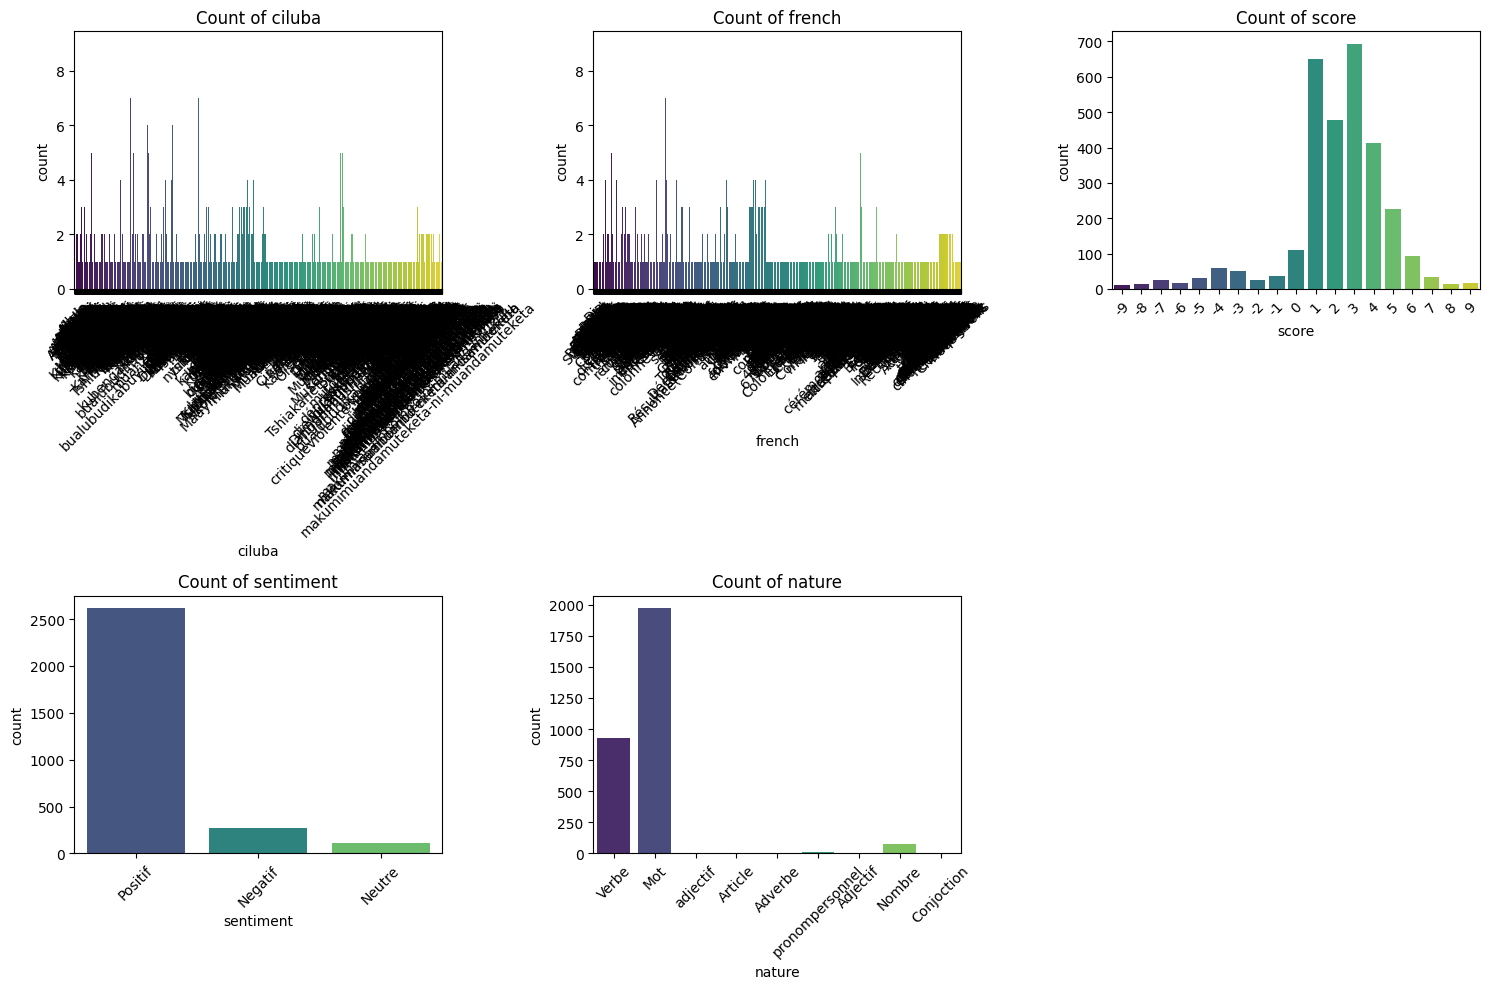

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = '~/Downloads/data_tshikama_xls.xlsx'  # Replace with your file path
#df = pd.read_excel(file_path)

# Ensure columns are named correctly
df.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature']


# Plot the count of each unique value for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from googletrans import Translator, constants
from pprint import pprint

# init the Google API translator
translator = Translator()

print(df['nature'].value_counts())
df['nature'] =df['nature'].replace('adjectif','Adjectif')
print(df['nature'].value_counts())
#https://stackoverflow.com/questions/52404971/get-a-list-of-categories-of-categorical-variable
pos = df['nature'].value_counts().index.values
print(pos)
def TranslatePOS(data):
    for label in pos:
        translation = translator.translate(label,src='fr')
        df['nature'] = df['nature'].replace(label,translation.text)
        print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    
    
    
TranslatePOS(pos)
print(df['nature'].value_counts())


In [42]:
df['English'] = df['English'].replace('\d+', '', regex=True)
df
df.to_csv('Assign3.csv')
#verbs = df.loc[df['nature'] == 'Verb']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\magai\AppData\Local\Temp\ipykernel_26600\1572862163.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['English'] = df['English'].replace('\d+', '', regex=True)


In [75]:

df['french'] = df['french'].str.lower()
#https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
duplicates = df[df.duplicated(['french'])] #Keep=False
print(duplicates)
duplicates['ciluba'].value_counts() # Where Value Counts greater than 1...
df[df.duplicated(['french'],keep=False)]

            ciluba     french  score sentiment            nature   English
107      tshiululu      nuage      1   Positif              Word     cloud
131        Kulamba   preparer      4   Positif              Verb   prepare
136   kusaminamoyi    manquer     -2   Negatif              Verb      miss
232         Buloba      terre      4   Positif              Word     Earth
235      Bikukibua   creature      5   Positif              Word  Creature
...            ...        ...    ...       ...               ...       ...
2980          Lala       dors      4   Positif              Word     Sleep
2981           Anu  seulement      3   Positif            Adverb      Only
2984          yeya         il      0    Neutre  personal pronoun        he
2985          tetu       nous      0    Neutre  personal pronoun        We
2991         Tshia         de      0    Neutre           Article        of

[1213 rows x 6 columns]


,ciluba,french,score,sentiment,nature,English
2,Akula,parle,2,Positif,Verb,Speak
4,Aluja,remet,3,Positif,Verb,Hands over
10,Andamuna,repond,9,Positif,Verb,Answers
11,Angata,prend,9,Positif,Verb,Takes
13,Bilamba,habits,8,Positif,Word,Clothes
...,...,...,...,...,...,...
2980,Lala,dors,4,Positif,Word,Sleep
2981,Anu,seulement,3,Positif,Adverb,Only
2984,yeya,il,0,Neutre,personal pronoun,he
2985,tetu,nous,0,Neutre,personal pronoun,We


In [ ]:
#Validate Parts of Speech Function

def TranslateToEnglish(data):
    #print(data)
    translation = translator.translate(data,src='fr')
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    return translation.text

df['English'] = (df['french']).apply(TranslateToEnglish)

df.to_csv('Assign3.csv')
#df_small = df[:50]
#df_small
#print(df_small['nature'].value_counts())

In [87]:
from datasets import load_metric
from keytotext import pipeline
nlp = pipeline("k2t")

print(df['nature'].value_counts().index.tolist())
nouns = df.loc[df['nature'] == 'Word']
verbs = df.loc[df['nature'] == 'Verb']
pronouns = df.loc[df['nature'] == 'personal pronoun']



#print(pronouns)
verb = verbs.sample()
noun = nouns.sample()
pronoun = pronouns.sample()
#https://stackoverflow.com/questions/16729574/how-can-i-get-a-value-from-a-cell-of-a-dataframe
verb = verb['English'].values[0]
noun = noun['English'].values[0]
pronoun = pronoun['English'].values[0]
print("Verb is",verb)
print("noun is",noun)
print("pronoun is",pronoun)
sentence = nlp([pronoun,verb,noun])



['Word', 'Verb', 'Number', 'personal pronoun', 'Adjective', 'Adverb', 'Article', 'Conjunction']
Verb is To wait for
noun is Clothes
pronoun is you


'You|To Wait for Clothes| Right|Love| Straight]]'

In [ ]:
#https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/
import contractions
# contracted text
text = '''I'll be there within 5 min. Shouldn't you be there too? 
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
 
# creating an empty list
expanded_words = []    
for word in text.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))   
   
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

In [69]:
#https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
#https://stackoverflow.com/questions/29397708/tagging-a-single-word-with-the-nltk-pos-tagger-tags-each-letter-instead-of-the-w
tagged = nltk.pos_tag(["run"])

print(tagged)
 

[('run', 'VB')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\magai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
data = translate_text_using_lexicon("Arrange Rearrange")
print(data)

In [19]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
#data = ["It was the best of times.", "t was the worst of times."]
#sentiment_pipeline(data)
data = ['on the floor']
sentiment_pipeline(data)
#https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid_obj= SentimentIntensityAnalyzer()

print(sid_obj.polarity_scores("camera")) 

model = SentimentIntensityAnalyzer()

#https://hex.tech/templates/sentiment-analysis/vader-sentiment-analysis/
# Use Vader and textBlob


score = model.polarity_scores("bad")
compound = score['compound']	
print(compound)  
extract_score("bad")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
-0.5423


In [1]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
#data = ["It was the best of times.", "t was the worst of times."]
#sentiment_pipeline(data)
data = ['potatoes']
sentiment_pipeline(data)
#print(df)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9646881818771362}]

In [2]:
from datasets import load_metric
from keytotext import pipeline
nlp = pipeline("k2t")

## pip uninstall datasets
## pip install datasets==v2.11.0 --user
## pip install tf-keras

Seed set to 42


In [3]:
nlp(['Soccer','Referee','Tough'])

"Soccer's referee is tough."

In [5]:
# default return type is a list
from googletrans import Translator, constants
from pprint import pprint
#langs_list = GoogleTranslator().get_supported_languages()  # output: [arabic, french, english etc...]

# alternatively, you can the dictionary containing languages mapped to their abbreviation
#langs_dict = GoogleTranslator().get_supported_languages(as_dict=True)  # output: {arabic: ar, french: fr, english:en etc...}
#print(langs_dict)
pprint(constants.LANGUAGES)

{'af': 'afrikaans',
 'am': 'amharic',
 'ar': 'arabic',
 'az': 'azerbaijani',
 'be': 'belarusian',
 'bg': 'bulgarian',
 'bn': 'bengali',
 'bs': 'bosnian',
 'ca': 'catalan',
 'ceb': 'cebuano',
 'co': 'corsican',
 'cs': 'czech',
 'cy': 'welsh',
 'da': 'danish',
 'de': 'german',
 'el': 'greek',
 'en': 'english',
 'eo': 'esperanto',
 'es': 'spanish',
 'et': 'estonian',
 'eu': 'basque',
 'fa': 'persian',
 'fi': 'finnish',
 'fr': 'french',
 'fy': 'frisian',
 'ga': 'irish',
 'gd': 'scots gaelic',
 'gl': 'galician',
 'gu': 'gujarati',
 'ha': 'hausa',
 'haw': 'hawaiian',
 'he': 'hebrew',
 'hi': 'hindi',
 'hmn': 'hmong',
 'hr': 'croatian',
 'ht': 'haitian creole',
 'hu': 'hungarian',
 'hy': 'armenian',
 'id': 'indonesian',
 'ig': 'igbo',
 'is': 'icelandic',
 'it': 'italian',
 'iw': 'hebrew',
 'ja': 'japanese',
 'jw': 'javanese',
 'ka': 'georgian',
 'kk': 'kazakh',
 'km': 'khmer',
 'kn': 'kannada',
 'ko': 'korean',
 'ku': 'kurdish (kurmanji)',
 'ky': 'kyrgyz',
 'la': 'latin',
 'lb': 'luxembourgish